# Introduction: 

The purpose of this project is to determine which movie genre is the most popular based on data gathered by IMBD. Our metric for determining the popularity of each genre will be based on its average ratings on a scale from 0-10. 

Films don't always fit in only in one genre, but may belong to many. For example, Star wars isn't just science fiction, it also contains a lot of action which means it is both a science fiction and action film. Because of this fact, we decided that it's a good idea to analyze our data in two distinct ways: 1) grouping genres together and treating each of them as one and 2) treating each distinct genre as it is.

Here is what we believe are the most popular genres (hypothesis):
Grouped Genres: Adventure, Science Fiction, Action
Individual Genres: Adventure

The reason why we chose 

In [132]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Data Collection:

We collected our data from the IMDB dataset. There were many options of different datasets but we decided to go with the "title.ratings" and "title.basics" datasets because of the average rating and genre columns (respoectfully) present in each set. This enables us to cross examine and check the possible correlation between high rating and particular genres.  

In [172]:
basics_data= pd.read_csv('title.basics.data.tsv', sep='\t')
rating_data = pd.read_csv('title.ratings.data.tsv', sep='\t')

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [179]:
data = basics_data.merge(rating_data,left_on='tconst', right_on='tconst')
data = data[data["titleType"] == "movie"]
data

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
8,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance,5.9,155
259,tt0000335,movie,Soldiers of the Cross,Soldiers of the Cross,0,1900,\N,\N,"Biography,Drama",6.0,39
337,tt0000502,movie,Bohemios,Bohemios,0,1905,\N,100,\N,4.7,7
371,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,\N,70,"Biography,Crime,Drama",6.1,593
391,tt0000615,movie,Robbery Under Arms,Robbery Under Arms,0,1907,\N,\N,Drama,4.5,14
...,...,...,...,...,...,...,...,...,...,...,...
1087195,tt9916132,movie,The Mystery of a Buryat Lama,The Mystery of a Buryat Lama,0,2018,\N,94,"Biography,Documentary,History",3.6,7
1087196,tt9916160,movie,Drømmeland,Drømmeland,0,2019,\N,72,Documentary,6.5,40
1087204,tt9916362,movie,Coven,Akelarre,0,2020,\N,90,"Drama,History,Horror",5.9,125
1087207,tt9916428,movie,The Secret of China,Hong xing zhao yao Zhong guo,0,2019,\N,\N,"Adventure,History,War",4.1,11


# Data Processesing:

## Tidying Data:

Since we asking our question concerning movies only, we isolate it from the dataset we collected. We then replace "\N" IMDB's null type to NaN. We don't really care about the length, end year and possible adult nature of the move so remove those columns as well. Having NaN, in the columns we want to do analysis would be cumbersome so we also remove rows within the data that contain NaN specifically in the genres, averageRating columns. We also noticed some indescrepencies with the types of the data rows. 

To find the average rating for each genre, we will use this equation:

$\frac {\sum {averageRating * numVotes}} {\sum {numVotes}}$

In [180]:
data = data.replace("\\N", np.nan)
#data= data.drop(columns="isAdult")
data.columns
data= data.reset_index()

In [181]:
#Drop all the rows where the genre is NaN
data = data.dropna(subset=["genres","averageRating"])
data

,index,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,8,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,NaN,45,Romance,5.9,155
1,259,tt0000335,movie,Soldiers of the Cross,Soldiers of the Cross,0,1900,NaN,NaN,"Biography,Drama",6.0,39
3,371,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,NaN,70,"Biography,Crime,Drama",6.1,593
4,391,tt0000615,movie,Robbery Under Arms,Robbery Under Arms,0,1907,NaN,NaN,Drama,4.5,14
5,399,tt0000630,movie,Hamlet,Amleto,0,1908,NaN,NaN,Drama,3.2,11
...,...,...,...,...,...,...,...,...,...,...,...,...
254976,1087195,tt9916132,movie,The Mystery of a Buryat Lama,The Mystery of a Buryat Lama,0,2018,NaN,94,"Biography,Documentary,History",3.6,7
254977,1087196,tt9916160,movie,Drømmeland,Drømmeland,0,2019,NaN,72,Documentary,6.5,40
254978,1087204,tt9916362,movie,Coven,Akelarre,0,2020,NaN,90,"Drama,History,Horror",5.9,125
254979,1087207,tt9916428,movie,The Secret of China,Hong xing zhao yao Zhong guo,0,2019,NaN,NaN,"Adventure,History,War",4.1,11


### Grouped Genres

We will first analyze the data without seperating each distinct genre from a movie. Basicaly treat all the different "strings" in the genres column of our data set as different genres.

In [182]:
#Group everything by their genres and count the number of votes, calculate the expected value, 
#and average rating for each
#Expected value is essentially the numerator of the equation above

data['expectedValue'] = data['averageRating'] *data["numVotes"]
grouped_genres = data[['genres','numVotes', 'expectedValue']]
grouped_genres  = grouped_genres .groupby(['genres']).sum()
grouped_genres ['averageRating'] = grouped_genres ['expectedValue']/grouped_genres['numVotes']
grouped_genres = grouped_genres.sort_values(by=['averageRating'], ascending=False)
grouped_genres 

,numVotes,expectedValue,averageRating
genres,,,
"Comedy,Documentary,Fantasy",5,47.0,9.400000
"Family,News",7,65.8,9.400000
"Documentary,Sport,Western",5,44.0,8.800000
"Comedy,Drama,Reality-TV",15,132.0,8.800000
"Documentary,Drama,Reality-TV",19,165.3,8.700000
...,...,...,...
"History,Sci-Fi,Thriller",312,842.4,2.700000
"Comedy,History,Horror",292,741.2,2.538356
"Horror,Reality-TV,Thriller",262,550.2,2.100000


### Individual Genres 

Now we will analyze the data by seperating each distinct genre from a movie. If a movie has 3 genres such as Comedy,Documentary,and Fantasy, we will "triple count" the movie by putting its statistics in those three different genres. Basically we will make 3 copies of the same row with the exception of the genres column, which will be different.

In [208]:
#Import regular expressions to help distinguish the different genres in the genres column
import re
from copy import deepcopy

#Extracts the different genres in the genres column. 
temp = []
i = 0
for row in data.iterrows():
    genres = re.split(",",row[1][9])
    #Makes copies of each row (with a different genre name) and puts it into temp
    for g in genres:
        row2 = deepcopy(row)
        row2[1][9] = g
        temp.append(row2[1])

#Convert temp into a dataframe
data2 = pd.DataFrame(data = temp)    
data2

,index,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,expectedValue
0,8,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,NaN,45,Romance,5.9,155,914.5
1,259,tt0000335,movie,Soldiers of the Cross,Soldiers of the Cross,0,1900,NaN,NaN,Biography,6.0,39,234.0
1,259,tt0000335,movie,Soldiers of the Cross,Soldiers of the Cross,0,1900,NaN,NaN,Drama,6.0,39,234.0
3,371,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,NaN,70,Biography,6.1,593,3617.3
3,371,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,NaN,70,Crime,6.1,593,3617.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
254978,1087204,tt9916362,movie,Coven,Akelarre,0,2020,NaN,90,Horror,5.9,125,737.5
254979,1087207,tt9916428,movie,The Secret of China,Hong xing zhao yao Zhong guo,0,2019,NaN,NaN,Adventure,4.1,11,45.1
254979,1087207,tt9916428,movie,The Secret of China,Hong xing zhao yao Zhong guo,0,2019,NaN,NaN,History,4.1,11,45.1
254979,1087207,tt9916428,movie,The Secret of China,Hong xing zhao yao Zhong guo,0,2019,NaN,NaN,War,4.1,11,45.1


In [209]:
#Group everything by their genres and count the number of votes, calculate the expected value, 
#and average rating for each
#Expected value is essentially the numerator of the equation above

individual_genres = data2[['genres','numVotes', 'expectedValue']]
individual_genres = individual_genres.groupby(['genres']).sum()
individual_genres['averageRating'] = individual_genres['expectedValue']/individual_genres['numVotes']
individual_genres = individual_genres.sort_values(by=['averageRating'], ascending=False)
individual_genres

,numVotes,expectedValue,averageRating
genres,,,
War,17818934,1.364557e+08,7.657906
News,365620,2.797777e+06,7.652145
Film-Noir,2990130,2.282448e+07,7.633274
Biography,55219144,4.167315e+08,7.546866
Western,8397266,6.320368e+07,7.526697
History,25522252,1.903967e+08,7.460029
Documentary,10712638,7.882246e+07,7.357894
Animation,48094691,3.535094e+08,7.350279
Drama,419619224,3.074662e+09,7.327268


## Is there a correlation between the number of votes and the average rating?

### Grouped Genres

m = 4.918761365252063e-08
b = 6.398169609377712


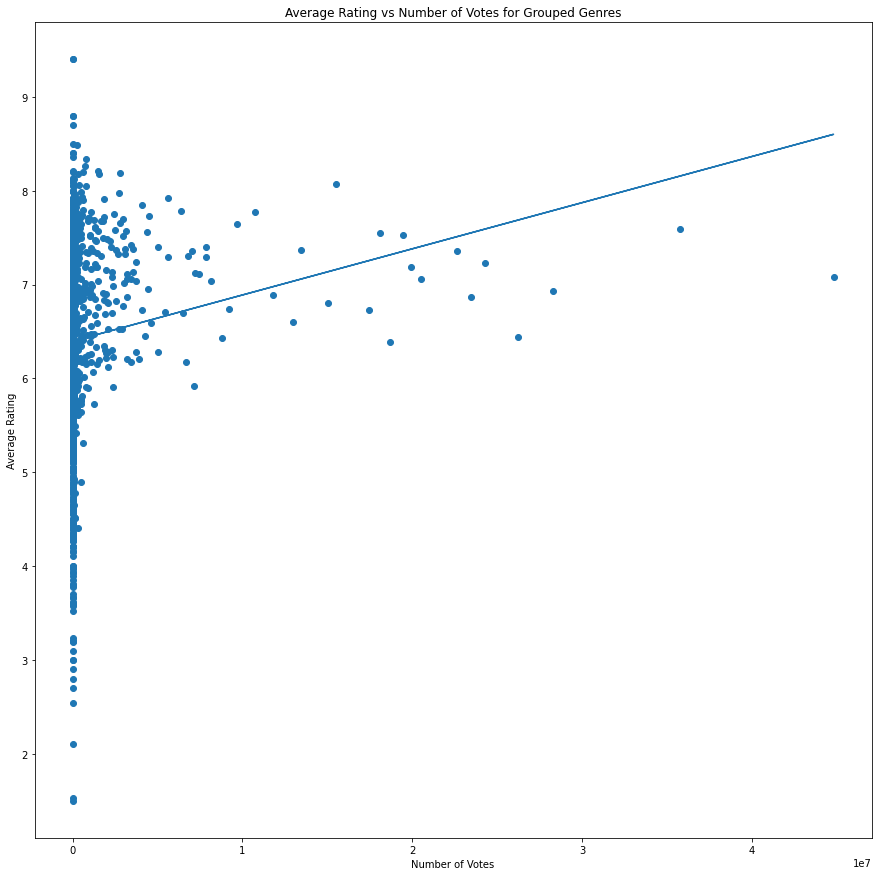

In [218]:
import matplotlib.pyplot as plt

#Create scatterplot for grouped genres
plt.figure(figsize=(15,15))
plt.scatter(x = grouped_genres["numVotes"], y = grouped_genres["averageRating"])
plt.xlabel("Number of Votes")
plt.ylabel("Average Rating")
plt.title("Average Rating vs Number of Votes for Grouped Genres")

#Plot and display the line of best fit (linear regression)
x = np.array(grouped_genres["numVotes"])
y = np.array(grouped_genres["averageRating"])
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)

print("m = " + str(m))
print("b = " + str(b))

In [221]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

sm.OLS(grouped_genres.numVotes,grouped_genres.averageRating).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               numVotes   R-squared (uncentered):                   0.059
Model:                            OLS   Adj. R-squared (uncentered):              0.058
Method:                 Least Squares   F-statistic:                              78.44
Date:                Fri, 18 Dec 2020   Prob (F-statistic):                    2.76e-18
Time:                        15:21:52   Log-Likelihood:                         -20444.
No. Observations:                1254   AIC:                                  4.089e+04
Df Residuals:                    1253   BIC:                                  4.090e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
averageRating  1.119e+05   1.26e+04      8.857      0.000    8.71e+04    1.37e+05
==============================================================================
Omnibus:                     1795.498   Durbin-Watson:                   1.942
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           393913.272
Skew:                           8.281   Prob(JB):                         0.00
Kurtosis:                      88.233   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Given that R-squared (uncentered) is 0.058 - 0.059, the correlation coefficient is 0.241 - 0.242, which means that there is a relatively low possitive correlation between the number of votes and the average ratings for grouped genres.

### Individual Genres

m = 7.145749951034177e-10
b = 6.907337630198603


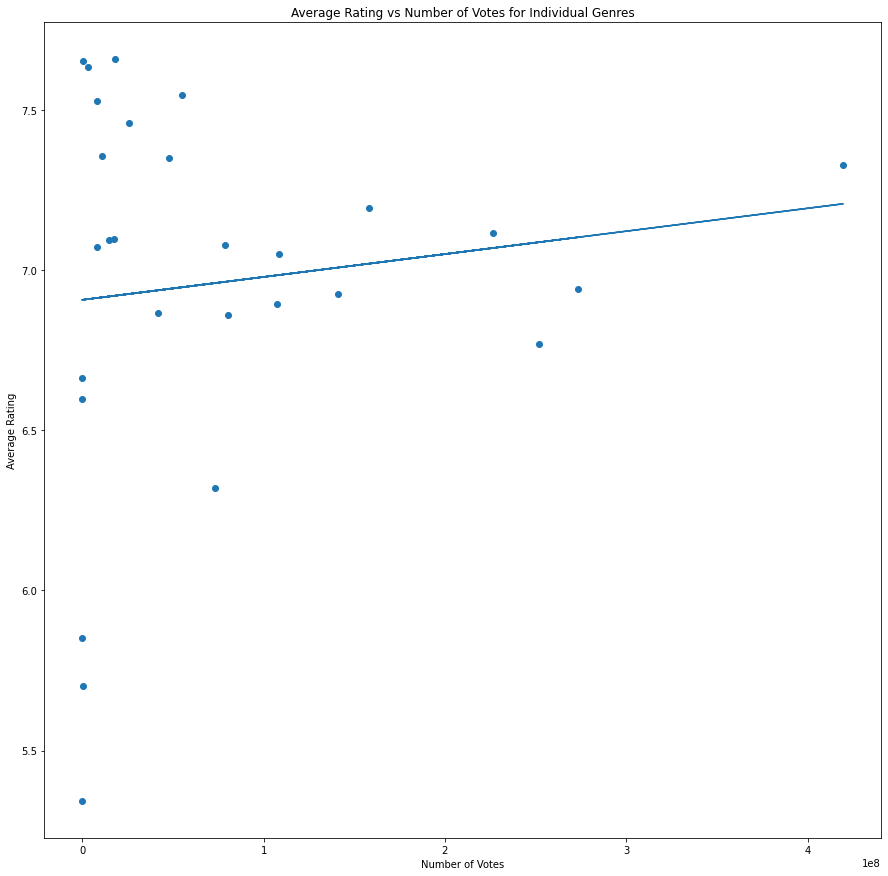

In [217]:
#Create scatterplot for individual genres
plt.figure(figsize=(15,15))
plt.scatter(x = individual_genres["numVotes"], y = individual_genres["averageRating"])
plt.xlabel("Number of Votes")
plt.ylabel("Average Rating")
plt.title("Average Rating vs Number of Votes for Individual Genres")

#Plot and display the line of best fit (linear regression)
x = np.array(individual_genres["numVotes"])
y = np.array(individual_genres["averageRating"])
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)

print("m = " + str(m))
print("b = " + str(b))

In [220]:
sm.OLS(individual_genres.numVotes,individual_genres.averageRating).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               numVotes   R-squared (uncentered):                   0.373
Model:                            OLS   Adj. R-squared (uncentered):              0.350
Method:                 Least Squares   F-statistic:                              16.07
Date:                Fri, 18 Dec 2020   Prob (F-statistic):                    0.000433
Time:                        15:18:45   Log-Likelihood:                         -555.96
No. Observations:                  28   AIC:                                      1114.
Df Residuals:                      27   BIC:                                      1115.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
averageRating  1.122e+07    2.8e+06      4.008      0.000    5.48e+06     1.7e+07
==============================================================================
Omnibus:                       18.261   Durbin-Watson:                   1.507
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.129
Skew:                           1.726   Prob(JB):                     2.58e-05
Kurtosis:                       5.488   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Given that R-squared (uncentered) is 0.350 - 0.373, the correlation coefficient is 0.592 - 0.610, which means that there is a moderately strong positive correlation between the number of votes and the average ratings for individual genres.

### Inferences

The purpose of testing if there was a correlation between the average rating and number of votes is to see if there was some sort of bias in our data. Since there was a slight positive correlation, there are a few things we could infer. If more positive reviews had more votes, then it could either mean that people really enjoyed the film and were more likely to leave a positive review on it. It could also mean that films with simply more votes, regardless of how good they actually are, will tend to do have a higher rating. The number of votes is also not the most accurate way of representing the number of people who watched a specific film.

To better adjust for average ratings based on the number of votes, we will use ANOVA.

## ANOVA